In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Copy of diabetes_.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 1. Check basic dataset info
print("DATASET INFO:")
print(data.info())

# Check missing values
print("\nMISSING VALUES:")
print(data.isnull().sum())

# Summary statistics
print("\nSUMMARY STATISTICS:")
print(data.describe())


DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

MISSING VALUES:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction

In [4]:
# 2. Handle missing data (drop or fill depending on % missing)
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent

# Fill or drop based on rule
for col in data.columns:
    if missing_percent[col] > 10:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data.dropna(subset=[col], inplace=True)

print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
#3. Create feature matrix X, target y, and split 70/30 from scratch
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
X_train.shape, X_test.shape


((538, 8), (230, 8))

In [14]:
# 4.1 Compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [11]:
# 4.2 Predict class for a single query
def knn_predict_single(q, X_train, y_train, k=3):
    distances = [euclidean_distance(q, x) for x in X_train]
    sorted_idx = np.argsort(distances)
    nearest = sorted_idx[:k]
    return np.bincount(y_train[nearest]).argmax()

In [15]:
# 4.3 Predict classes for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

In [16]:
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# 4.4 Evaluate model accuracy
pred_original = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, pred_original)
accuracy_original

np.float64(0.6739130434782609)

In [17]:
# 1.1 Scale the feature matrix X
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled[:5]


array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

In [18]:
# 1.2 Perform train-test split on scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)
X_train_s.shape, X_test_s.shape


((538, 8), (230, 8))

In [19]:
# 1.3 Run KNN on scaled data and compute accuracy
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)
accuracy_scaled


np.float64(0.691304347826087)

In [20]:
# 2. Compare accuracy before and after scaling
accuracy_original, accuracy_scaled


(np.float64(0.6739130434782609), np.float64(0.691304347826087))

In [21]:
# 1.1 Accuracy for k = 1 to 15 (original data)
accuracy_original_list = []

for k in range(1, 16):
    pred_k = knn_predict(X_test, X_train, y_train, k)
    acc = compute_accuracy(y_test, pred_k)
    accuracy_original_list.append(acc)

accuracy_original_list


[np.float64(0.6869565217391305),
 np.float64(0.7260869565217392),
 np.float64(0.6739130434782609),
 np.float64(0.7217391304347827),
 np.float64(0.6869565217391305),
 np.float64(0.7),
 np.float64(0.691304347826087),
 np.float64(0.7130434782608696),
 np.float64(0.7),
 np.float64(0.717391304347826),
 np.float64(0.7304347826086957),
 np.float64(0.7391304347826086),
 np.float64(0.7434782608695653),
 np.float64(0.7260869565217392),
 np.float64(0.7391304347826086)]

In [22]:
# 1.2 Accuracy for k = 1 to 15 (scaled data)
accuracy_scaled_list = []

for k in range(1, 16):
    pred_k_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    acc_s = compute_accuracy(y_test_s, pred_k_s)
    accuracy_scaled_list.append(acc_s)

accuracy_scaled_list


[np.float64(0.6739130434782609),
 np.float64(0.6782608695652174),
 np.float64(0.691304347826087),
 np.float64(0.6956521739130435),
 np.float64(0.6782608695652174),
 np.float64(0.6652173913043479),
 np.float64(0.7130434782608696),
 np.float64(0.6956521739130435),
 np.float64(0.7217391304347827),
 np.float64(0.7043478260869566),
 np.float64(0.7),
 np.float64(0.6869565217391305),
 np.float64(0.691304347826087),
 np.float64(0.6869565217391305),
 np.float64(0.7086956521739131)]

In [23]:
# 1.3 Prediction time (original data)
import time

time_original_list = []

for k in range(1, 16):
    start = time.time()
    knn_predict(X_test, X_train, y_train, k)
    end = time.time()
    time_original_list.append(end - start)

time_original_list


[1.337012767791748,
 0.7886428833007812,
 0.782210111618042,
 0.7871918678283691,
 0.7683491706848145,
 0.7916676998138428,
 1.2958998680114746,
 1.4005279541015625,
 1.4027879238128662,
 0.768972635269165,
 0.7769091129302979,
 0.7805352210998535,
 0.7935223579406738,
 0.7877151966094971,
 0.773296594619751]

In [24]:
# 1.4 Prediction time (scaled data)
time_scaled_list = []

for k in range(1, 16):
    start = time.time()
    knn_predict(X_test_s, X_train_s, y_train_s, k)
    end = time.time()
    time_scaled_list.append(end - start)

time_scaled_list


[1.3404643535614014,
 0.895859956741333,
 1.368938684463501,
 1.3904900550842285,
 1.1958272457122803,
 0.7946071624755859,
 0.800128698348999,
 0.7831084728240967,
 0.7651886940002441,
 0.7887463569641113,
 0.7976882457733154,
 0.7853081226348877,
 0.7799265384674072,
 0.7779712677001953,
 0.7954840660095215]

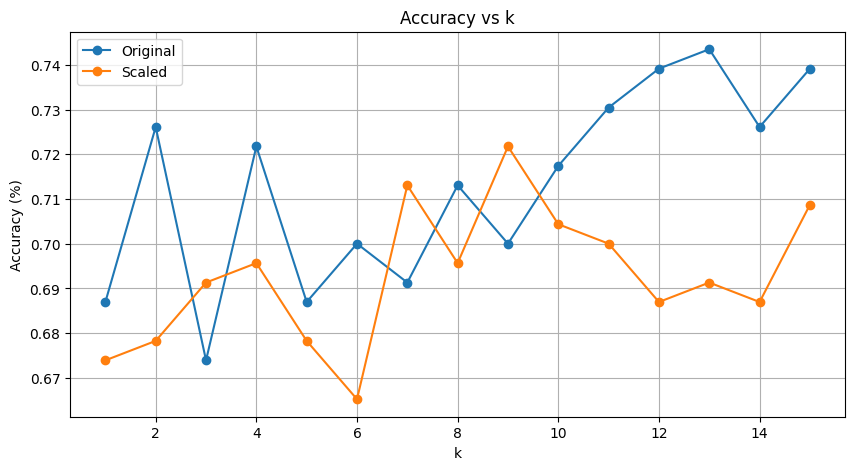

In [25]:
# 2.1 Plot accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1,16), accuracy_original_list, marker='o', label='Original')
plt.plot(range(1,16), accuracy_scaled_list, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()


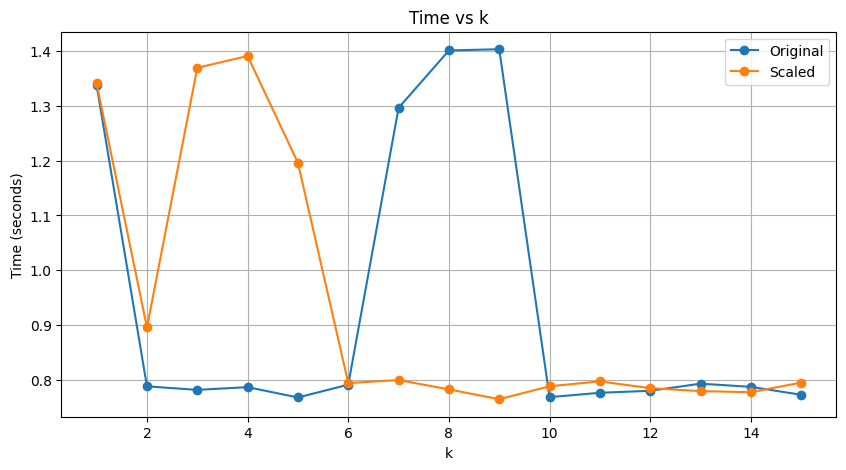

In [26]:
# 2.2 Plot time comparison
plt.figure(figsize=(10,5))
plt.plot(range(1,16), time_original_list, marker='o', label='Original')
plt.plot(range(1,16), time_scaled_list, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("Time vs k")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# 3.1 Find the best k (highest accuracy)
best_k_original = accuracy_original_list.index(max(accuracy_original_list)) + 1
best_k_scaled = accuracy_scaled_list.index(max(accuracy_scaled_list)) + 1

best_k_original, best_k_scaled


(13, 9)